In [188]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

In [189]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


In [190]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
# changed optomizer to adam as adadelta was having issues and loss to mean squared error 
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [191]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [192]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 2s 7ms/step - loss: 0.0923 - accuracy: 0.0035 - val_loss: 0.0343 - val_accuracy: 0.0109
Epoch 2/5
235/235 [==============================] - 2s 7ms/step - loss: 0.0314 - accuracy: 0.0121 - val_loss: 0.0253 - val_accuracy: 0.0117
Epoch 3/5
235/235 [==============================] - 2s 7ms/step - loss: 0.0239 - accuracy: 0.0151 - val_loss: 0.0207 - val_accuracy: 0.0151
Epoch 4/5
235/235 [==============================] - 2s 7ms/step - loss: 0.0198 - accuracy: 0.0150 - val_loss: 0.0179 - val_accuracy: 0.0180
Epoch 5/5
235/235 [==============================] - 2s 7ms/step - loss: 0.0173 - accuracy: 0.0167 - val_loss: 0.0164 - val_accuracy: 0.0175


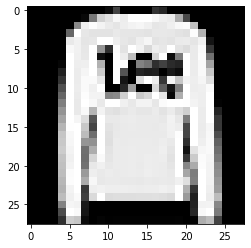

In [175]:
# Original image
plt.imshow(x_test[1].reshape(28,28), cmap="gray")

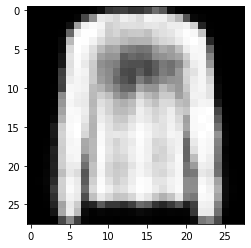

In [177]:
# Decoded image
prediction = autoencoder.predict([x_test[1].reshape(1,784)])
plt.imshow(prediction.reshape((28,28)), cmap="gray")
# print(prediction)

In [193]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# hidden layer matching encoded layer
hidden = Dense(128, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
# changed optomizer to adam as adadelta was having issues and loss to mean squared error 
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [194]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [195]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 3s 10ms/step - loss: 0.0802 - accuracy: 0.0058 - val_loss: 0.0262 - val_accuracy: 0.0155
Epoch 2/5
235/235 [==============================] - 2s 10ms/step - loss: 0.0240 - accuracy: 0.0137 - val_loss: 0.0200 - val_accuracy: 0.0128
Epoch 3/5
235/235 [==============================] - 2s 10ms/step - loss: 0.0192 - accuracy: 0.0122 - val_loss: 0.0175 - val_accuracy: 0.0156
Epoch 4/5
235/235 [==============================] - 2s 10ms/step - loss: 0.0170 - accuracy: 0.0155 - val_loss: 0.0161 - val_accuracy: 0.0164
Epoch 5/5
235/235 [==============================] - 2s 9ms/step - loss: 0.0158 - accuracy: 0.0164 - val_loss: 0.0151 - val_accuracy: 0.0206


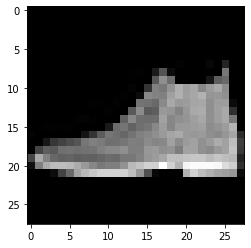

In [206]:
# Original image
plt.imshow(x_test[0].reshape(28,28), cmap="gray")

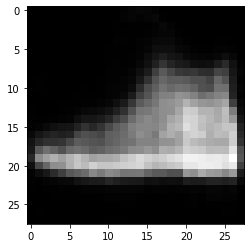

In [207]:
# Decoded image
prediction = autoencoder.predict([x_test[0].reshape(1,784)])
plt.imshow(prediction.reshape(28,28), cmap="gray")
# print(prediction)